In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#Loading the Dataset
zomato=pd.read_csv(r"C:\Users\User\Downloads\final_zomato.xls")
zomato

## 1. Number of Restaurants by Location

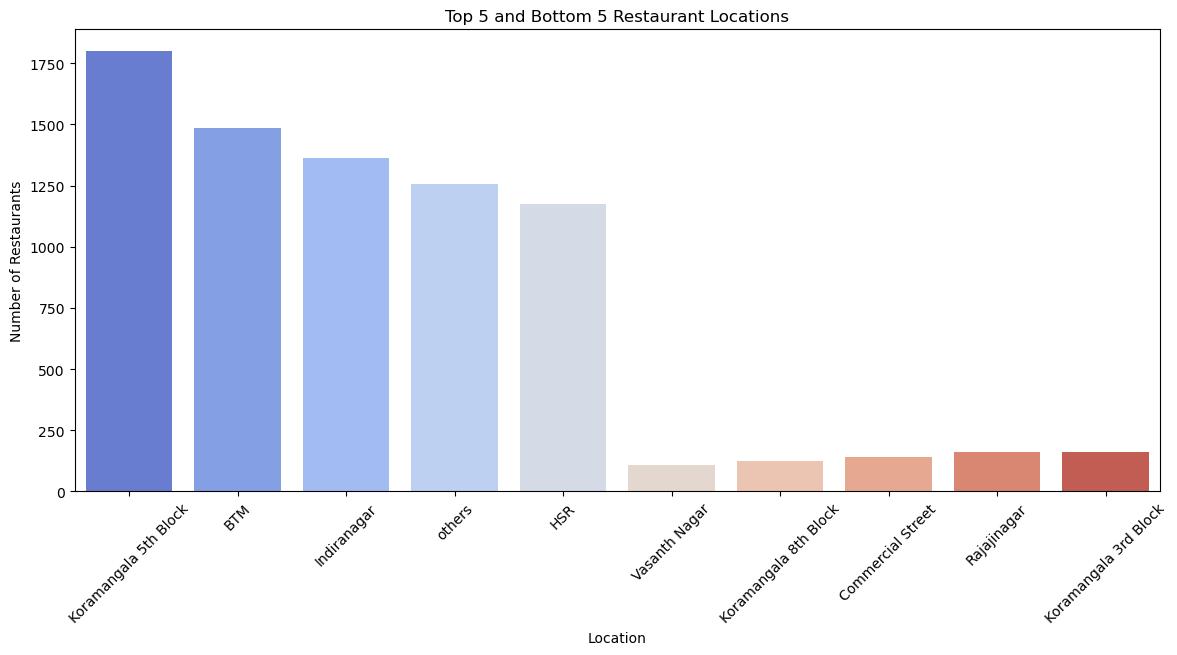

In [38]:
# Get location counts
location_counts = zomato['location'].value_counts()

# Get top 5 and bottom 5
top5 = location_counts.nlargest(5)
bottom5 = location_counts.nsmallest(5)

# Combine them into one DataFrame
top_bottom = pd.concat([top5, bottom5])

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=top_bottom.index, y=top_bottom.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title('Top 5 and Bottom 5 Restaurant Locations')
plt.ylabel('Number of Restaurants')
plt.xlabel('Location')
plt.show()

### Key Insights:

1.High concentration in popular areas – The top 5 locations (e.g., Koramangala, Indiranagar, etc.) have a significantly higher restaurant density, showing these are prime dining hubs with strong customer footfall and competition.

2.Low market presence in bottom 5 – The bottom 5 locations have minimal restaurant representation, suggesting either low demand, limited infrastructure, or untapped markets that could be explored.

3.Potential business strategy – While top 5 areas offer visibility and customer reach, the bottom 5 areas might present low-competition opportunities for niche or first-mover advantage if demand grows.


## 2.Various Types of Restaurant we have in Bangalore

rest_type
Casual Dining         7387
others                5583
Quick Bites           5267
Cafe                  2380
Dessert Parlor        1083
Casual Dining, Bar     986
Delivery               707
Name: count, dtype: int64


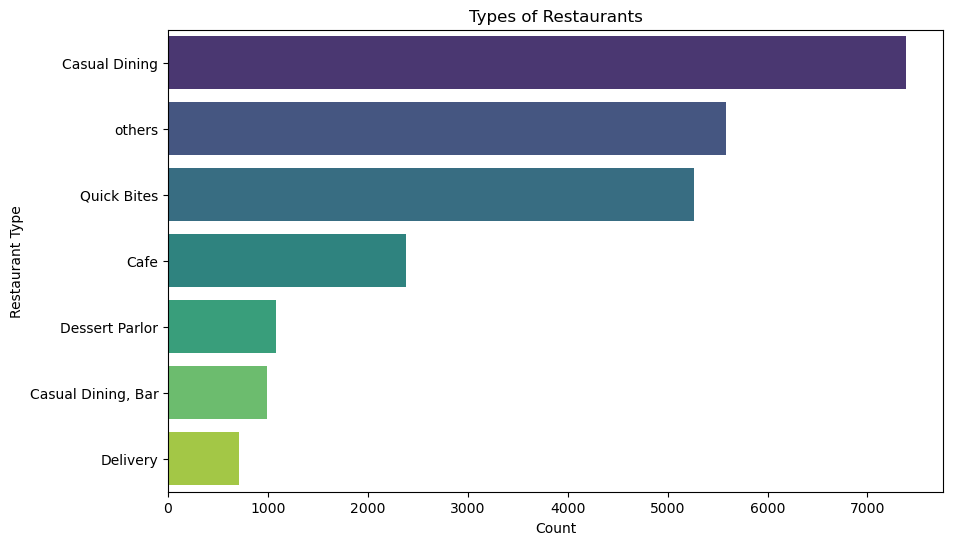

In [41]:
rest_type_counts = zomato["rest_type"].value_counts()
print(rest_type_counts.head(10))

plt.figure(figsize=(10,6))
sns.countplot(data=zomato, y='rest_type', order=zomato['rest_type'].value_counts().index, palette='viridis')
plt.title("Types of Restaurants")
plt.xlabel("Count")
plt.ylabel("Restaurant Type")
plt.show()

### Key Insights:

1.Casual Dining dominates – 
It is the most common restaurant type by a wide margin, with around 7,400 outlets, showing strong customer preference for sit-down dining experiences.

2.Specialized formats are niche – 
Dessert Parlors, Casual Dining Bars, and Delivery-only outlets have relatively small market presence, each with under 1,100 outlets, catering to more specific customer needs.

3.Opening a Casula Dining or a Bar will help you earn more money as the number of these are very less in the market.

## 3.The Top rated restaurants from each Area

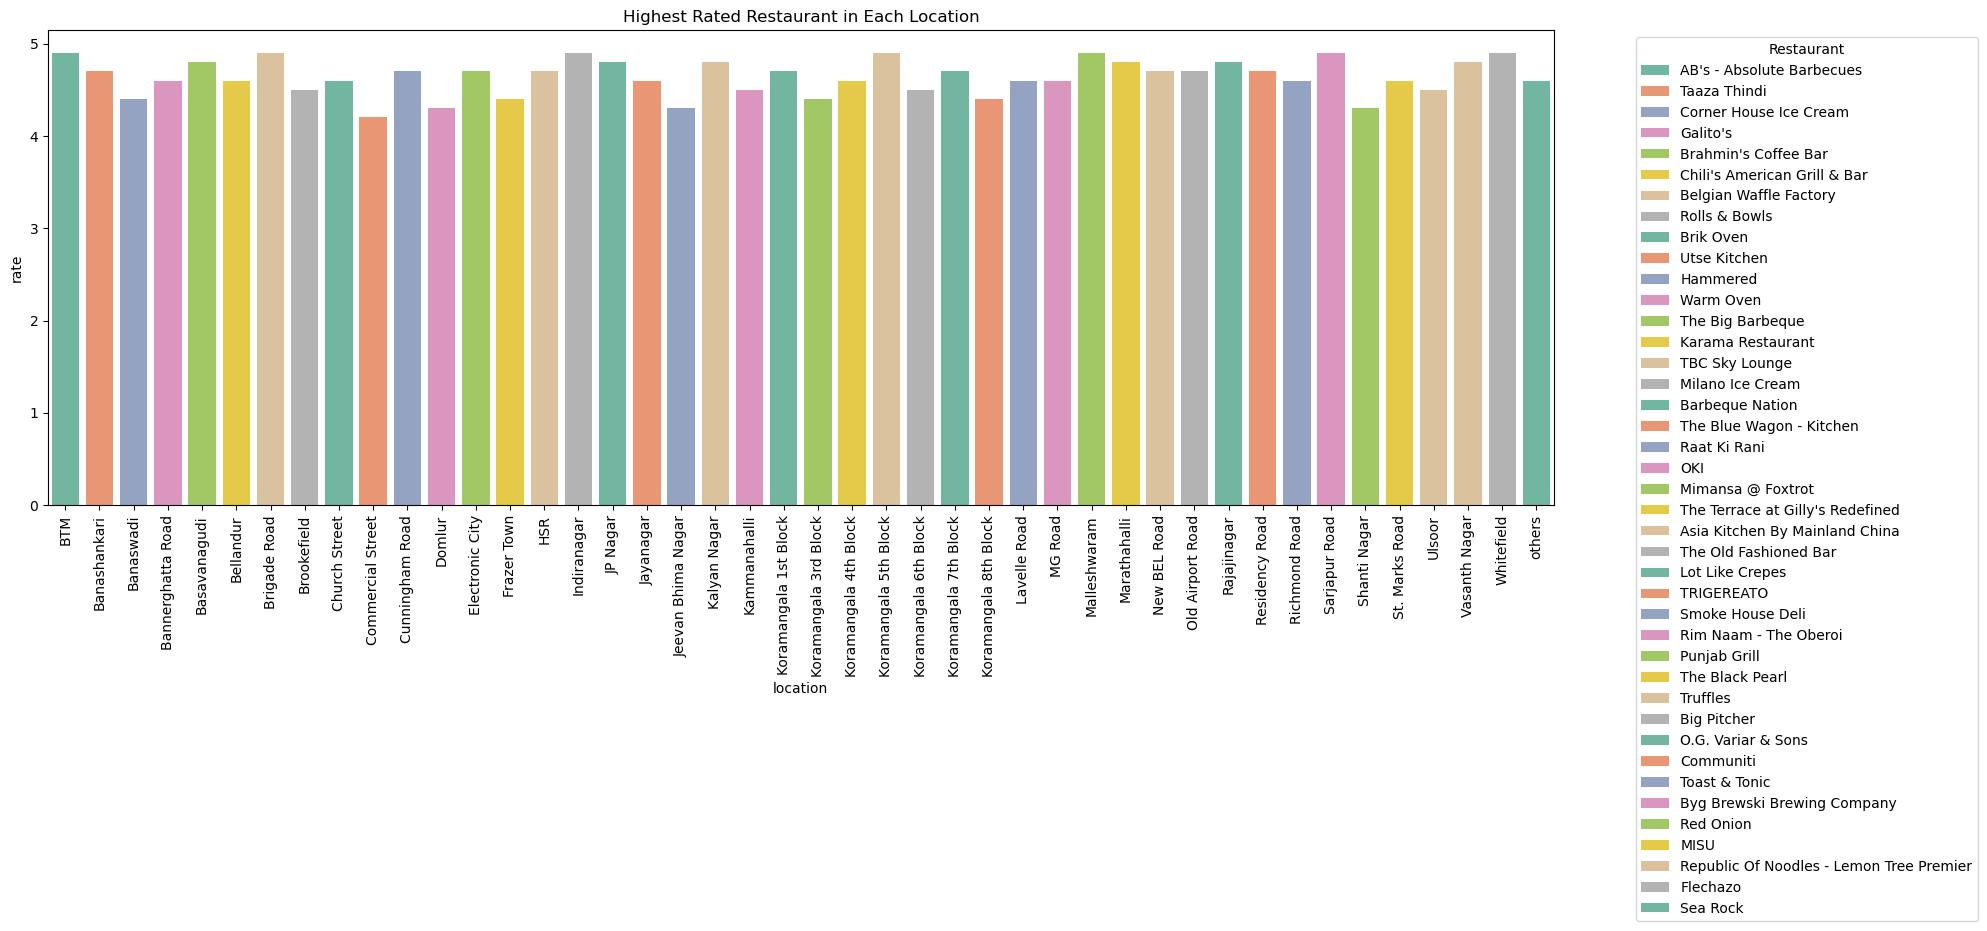

In [46]:
q2 = zomato.loc[zomato.groupby('location')['rate'].idxmax()]
plt.figure(figsize=(20, 8))
sns.barplot(data=q2, x='location', y='rate', hue='name', dodge=False, palette='Set2')
plt.title('Highest Rated Restaurant in Each Location')
plt.xticks(rotation=90)
plt.legend(title='Restaurant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Key Insights:

1.High rating consistency across locations – 
Most highest-rated restaurants in each location score between 4.3 and 4.9, showing strong competition in quality.

2.No single restaurant dominates all locations – 
The top-rated spot varies widely by area, suggesting that local favorites and niche offerings are key to success in different neighborhoods.

3.Premium and specialty brands perform strongly – 
Many highest-rated restaurants are well-known for specific cuisines (e.g., barbeque, desserts, or coffee), indicating that specialization helps secure top ratings.

## 4.Best choice of the Restaurant for different Cuisine in Banagalore

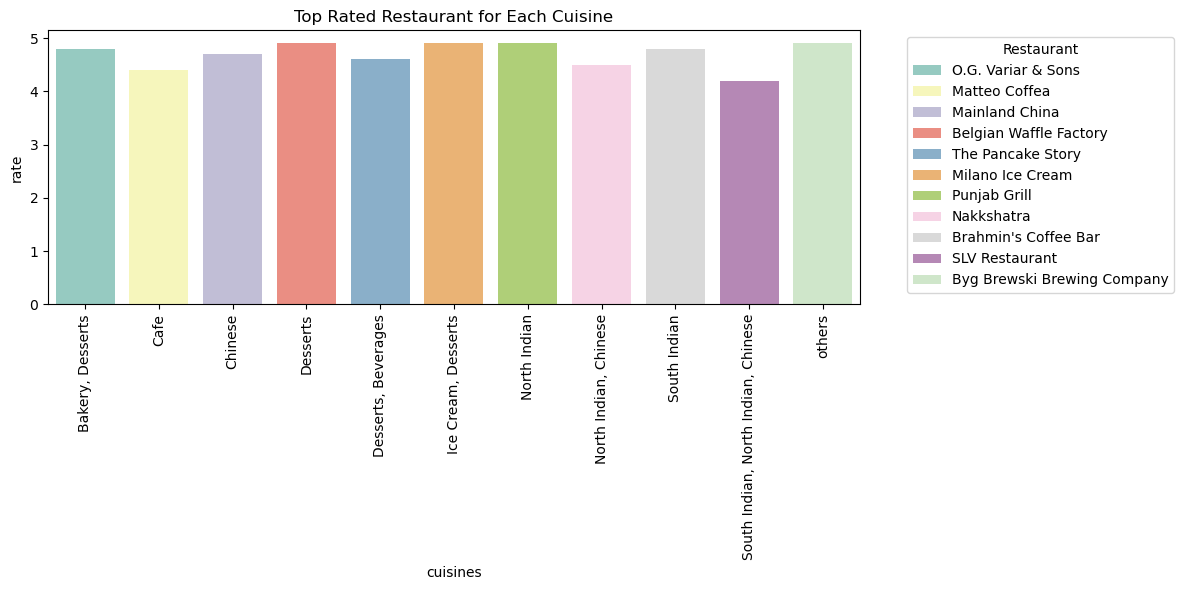

In [44]:
q3 = zomato.loc[zomato.groupby('cuisines')['rate'].idxmax()]
plt.figure(figsize=(12, 6))
sns.barplot(data=q3, x='cuisines', y='rate', hue='name', dodge=False, palette='Set3')
plt.title('Top Rated Restaurant for Each Cuisine')
plt.xticks(rotation=90)
plt.legend(title='Restaurant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Key Insights:

1.Dessert-focused restaurants dominate top ratings – 
Belgian Waffle Factory and Milano Ice Cream lead their categories with ratings close to 5, showing strong customer preference for sweet-focused cuisines.

2.North Indian cuisine holds consistently high ratings – 
Punjab Grill achieves nearly perfect scores, indicating high customer satisfaction for this category.

3.Cafés have relatively lower top ratings – 
Matteo Coffea, while leading in the Café category, has the lowest rating among top cuisine leaders, suggesting greater competition or varied customer expectations in this segment.

## 5. Online and book table based on rest_type

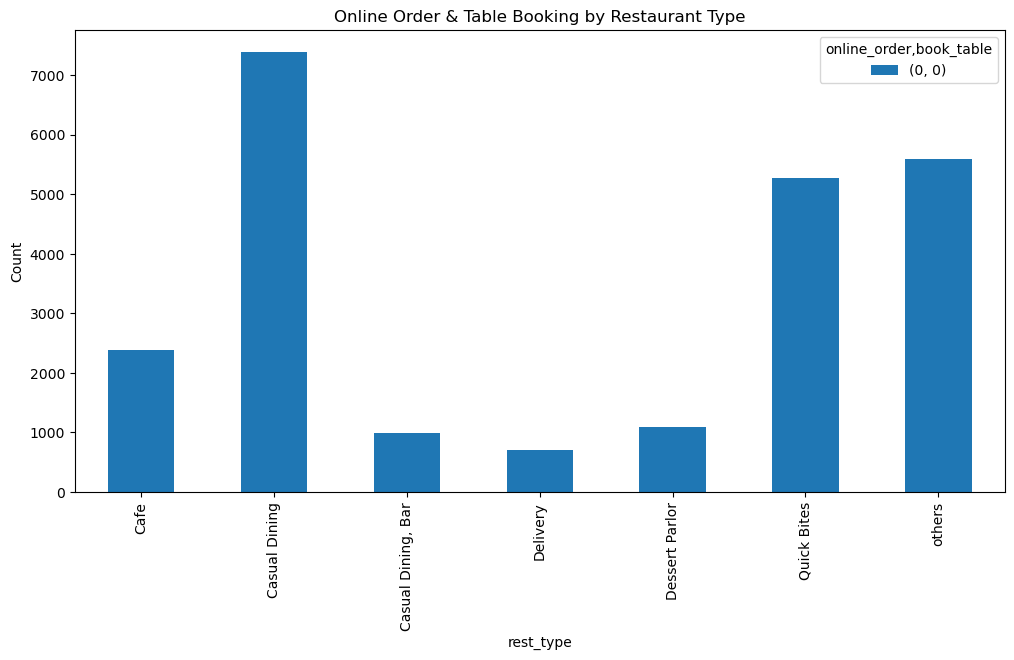

In [74]:
online_book = pd.crosstab(zomato['rest_type'], [zomato['online_order'], zomato['book_table']])
online_book.plot(kind='bar', figsize=(12,6))
plt.title("Online Order & Table Booking by Restaurant Type")
plt.ylabel("Count")
plt.show()

### Key Insights:

1.Casual Dining dominates – 
It has the highest number of restaurants without online ordering or table booking, surpassing 7,000, indicating this type is the most common in this category.

2.Quick Bites and “Others” are also popular – 
Both have counts above 5,000, suggesting these are significant segments for non-online/non-reservation dining.

3.Delivery-focused restaurants are rare in this segment – 
Delivery and Dessert Parlors have notably low counts, under 1,200, meaning they are less likely to operate without online ordering or reservations.


## 6. Dish liked with type and cost_for_two

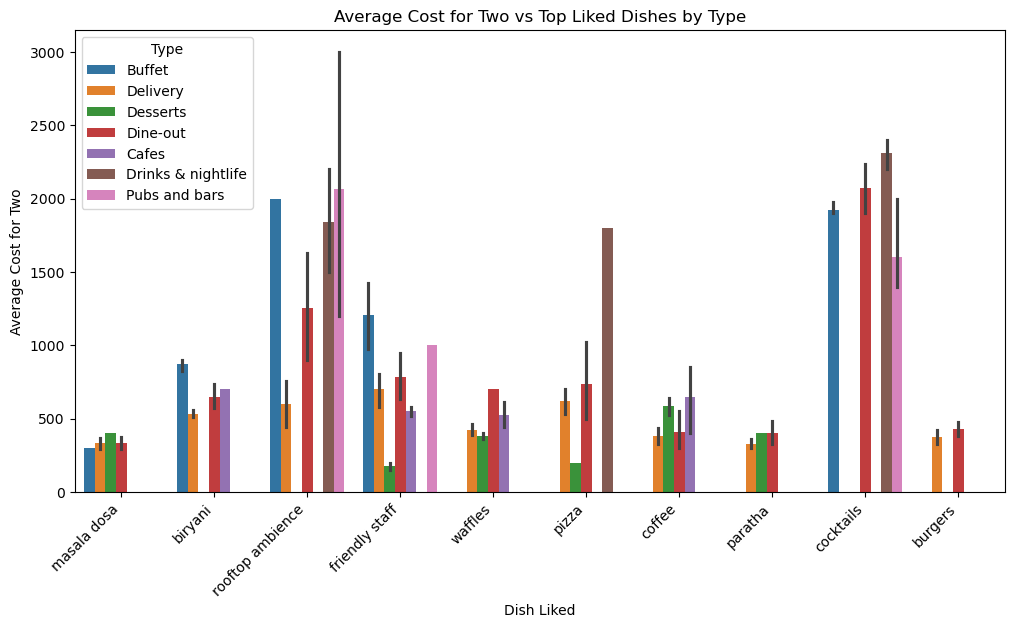

In [49]:
# Prepare data: take top 10 most liked dishes
top_dishes = zomato['dish_liked'].value_counts().nlargest(10).index
filtered = zomato[zomato['dish_liked'].isin(top_dishes)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=filtered,
    x='dish_liked',
    y='cost_for_two',
    hue='type',
    estimator='mean',
    palette='tab10'
)

plt.xticks(rotation=45, ha='right')
plt.title("Average Cost for Two vs Top Liked Dishes by Type")
plt.ylabel("Average Cost for Two")
plt.xlabel("Dish Liked")
plt.legend(title="Type")
plt.show()

### Key Insights: 

1.Casual Dining leads significantly – 
It’s the top restaurant type without online ordering or table booking, exceeding 7,000 listings.

2.Quick Bites is the second most common – 
With over 5,000 outlets, it shows strong offline presence.

3.Delivery and Dessert Parlors are rare –
Both have low counts (under 1,200), meaning most in these categories rely on online orders or reservations.

## 7.Cost for Two by Type

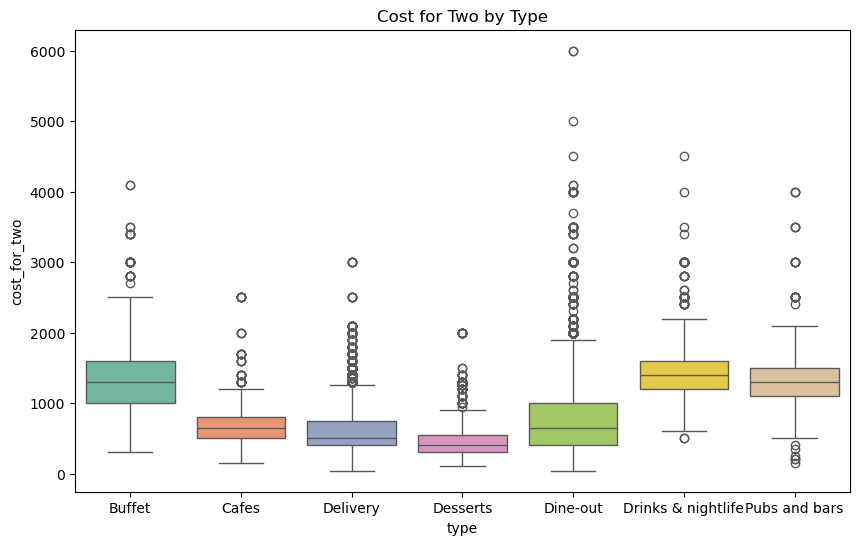

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(data=zomato, x='type', y='cost_for_two', hue='type', palette='Set2')
plt.title("Cost for Two by Type")
plt.show()


### Key Insights: 

Casual Dining dominates – 
It’s the most common restaurant type, far surpassing all others in count.

Quick Bites is the clear runner-up – 
While smaller than Casual Dining, it still holds a strong market presence.

Niche categories are minimal – 
Types like Buffet, Pub, and Microbrewery have very few outlets, indicating a highly specialized market.

## 8. Location wise cost

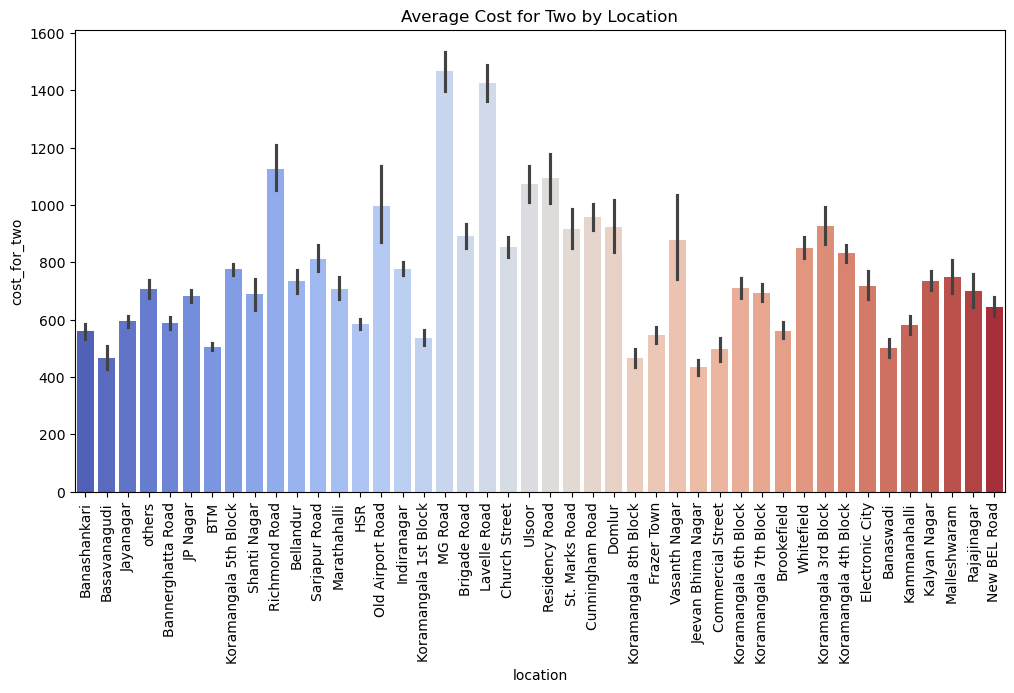

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(data=zomato, x='location', y='cost_for_two', estimator='mean', palette='coolwarm')
plt.title("Average Cost for Two by Location")
plt.xticks(rotation=90)
plt.show()

### Key Insights:

1.High-End Areas: Locations like Brigade Road and Church Street have the highest average cost for two, exceeding ₹1400.

2.Affordable Options: Areas such as Old Airport Road and HSR are significantly more affordable, with an average cost around ₹600.

3.Koramangala's Price Variation: 
Within the same large neighborhood, Koramangala, there is a wide range of pricing, with some blocks (e.g., 3rd and 4th) being more expensive than others (e.g., 5th and 7th).

## 9.Do restaurants with table booking have better ratings?

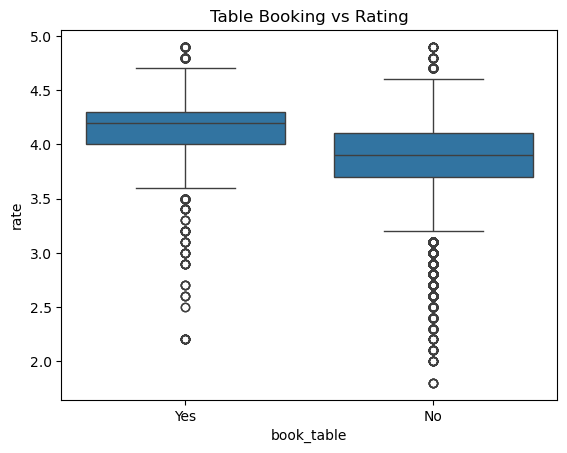

In [53]:
sns.boxplot(x='book_table', y='rate', data=zomato)
plt.title("Table Booking vs Rating")
plt.show()

### Key Insights:

Offering table booking might improve customer satisfaction and ratings.
Consistency in ratings suggests that booking restaurants may deliver more predictable experiences.

## 10.Which restaurant has the best rating per rupee spent

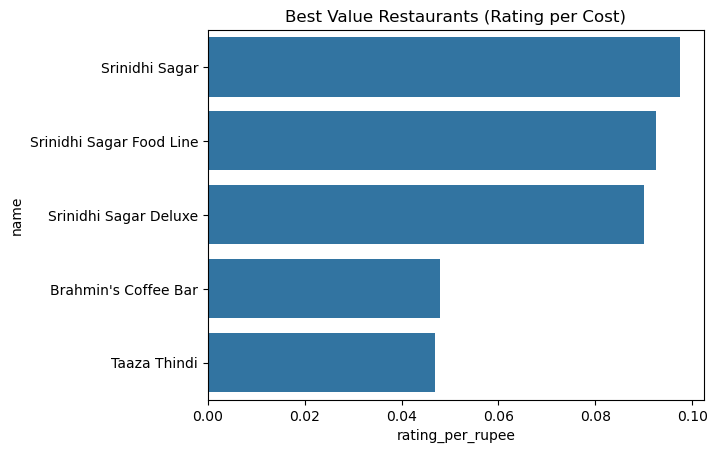

In [54]:
zomato['rating_per_rupee'] = zomato['rate'] / zomato['cost_for_two']
best_value = zomato.sort_values('rating_per_rupee', ascending=False).head(10)
sns.barplot(x='rating_per_rupee', y='name', data=best_value)
plt.title('Best Value Restaurants (Rating per Cost)')
plt.show()

### Key Insights:

Low cost with high ratings is a competitive edge in the food industry.
The Srinidhi Sagar chain appears to dominate in the budget-friendly yet high-quality segment.
For budget-conscious diners seeking maximum satisfaction for their spending, the top three restaurants are clear choices.

## 11.Are higher-rated restaurants more likely to accept online orders?

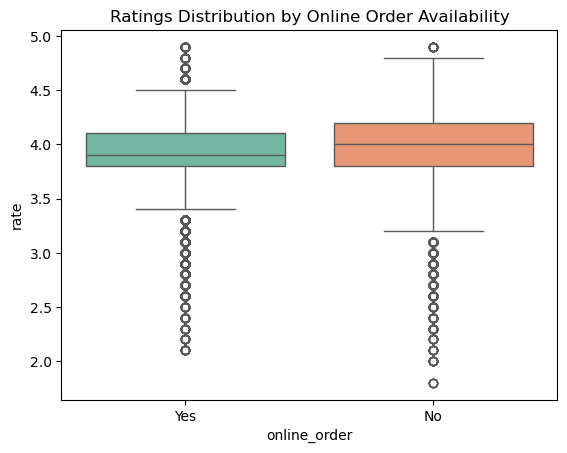

In [55]:
sns.boxplot(data=zomato, x='online_order', y='rate', palette='Set2')
plt.title('Ratings Distribution by Online Order Availability')
plt.show()

### Key Insights:

Offering online orders doesn’t automatically boost ratings — quality of service and food likely matter more.
However, the "Yes" category has more restaurants achieving exceptionally high ratings, which might indicate that online ordering helps well-performing restaurants stand out more.
The large number of low-rating outliers in both categories suggests a need to focus on service consistency.

## 12.Most Liked Dish by Restaurant Type

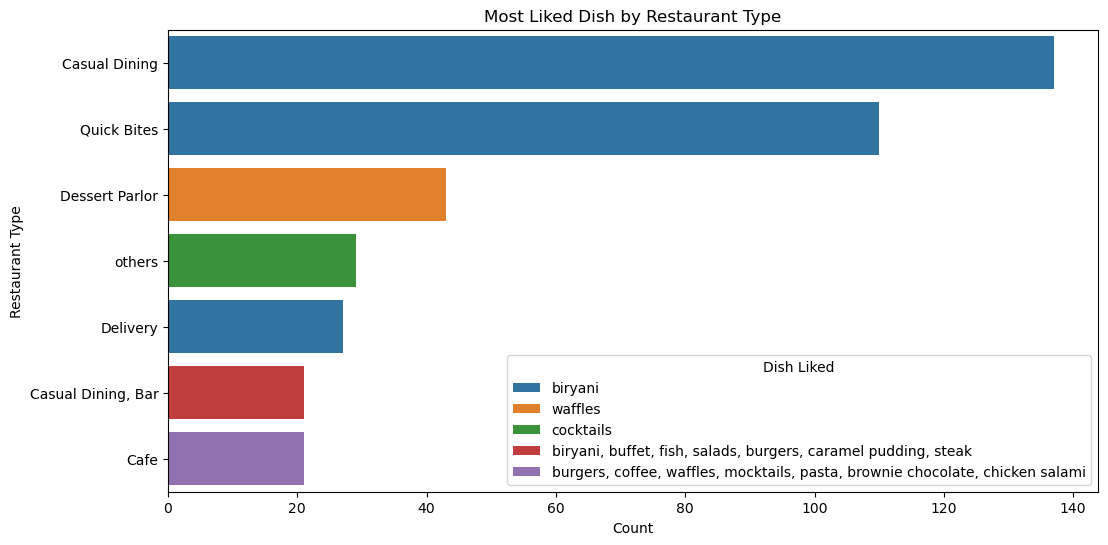

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_dish_by_rest_type,
    x='count',
    y='rest_type',
    hue='dish_liked',
    dodge=False
)
plt.title("Most Liked Dish by Restaurant Type")
plt.xlabel("Count")
plt.ylabel("Restaurant Type")
plt.legend(title="Dish Liked")
plt.show()

### Key Insights:

1.Biryani's Dominance: Biryani is the most liked dish in both "Casual Dining" and "Quick Bites" restaurants, highlighting its widespread popularity.

2.Dessert Parlor Specialization: Dessert Parlors are specifically known for waffles.

3.Cafe Diversity: Cafes have a broad range of popular items, including burgers, coffee, and pasta.